# Adidas Nike classifier


In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D # 1 
from keras.layers import MaxPooling2D #2
from keras.layers import Flatten #3
from keras.layers import Dense #4 FULLY CONNECTED LAYER 

In [2]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2))) # AVERAGE = FILTER HIGHER NUMBER 

# Step 3 -  convolutional layer
# Adding a second convolutional layer
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 4 - Flattening
classifier.add(Flatten())  #one dimensional

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))  # hidden layer 1
classifier.add(Dense(units = 64, activation = 'relu')) # hidden layer 2

classifier.add(Dense(units = 1, activation = 'sigmoid')) #output Layer 


In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\hp\OneDrive\Pictures\Saved Pictures\dataset\training_set',
                                                 target_size = (64, 64), # image size reduce
                                                 batch_size = 32, # group
                                                 class_mode='binary') 

test_set = test_datagen.flow_from_directory(r'C:\Users\hp\OneDrive\Pictures\Saved Pictures\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode='binary') 

Found 100 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


we know based on probability it convert output as 0 and 1.

In [6]:
training_set.class_indices

{'addidas': 0, 'nike': 1}

In [7]:
# ignore warnings
import warnings 
warnings.filterwarnings("ignore")

In [8]:
# fitting model
result=classifier.fit(training_set,
                         epochs=50, #repeat
                         validation_data = test_set)

Epoch 1/50
4/4 [==============================] - 3s 582ms/step - loss: 0.6961 - accuracy: 0.5100 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/50
4/4 [==============================] - 1s 130ms/step - loss: 0.6904 - accuracy: 0.5200 - val_loss: 0.6875 - val_accuracy: 0.6750
Epoch 3/50
4/4 [==============================] - 1s 135ms/step - loss: 0.6940 - accuracy: 0.5600 - val_loss: 0.6896 - val_accuracy: 0.5000
Epoch 4/50
4/4 [==============================] - 1s 158ms/step - loss: 0.6875 - accuracy: 0.5000 - val_loss: 0.6885 - val_accuracy: 0.5000
Epoch 5/50
4/4 [==============================] - 0s 129ms/step - loss: 0.6829 - accuracy: 0.5000 - val_loss: 0.6881 - val_accuracy: 0.5000
Epoch 6/50
4/4 [==============================] - 0s 90ms/step - loss: 0.6780 - accuracy: 0.5000 - val_loss: 0.6851 - val_accuracy: 0.5000
Epoch 7/50
4/4 [==============================] - 0s 94ms/step - loss: 0.6706 - accuracy: 0.5000 - val_loss: 0.6820 - val_accuracy: 0.5000
Epoch 8/50
4/4 [======

In [9]:
# saving model
classifier.save('addi_nike_classifier.h5')

!pip install opencv-python-headless==4.5.2.52

In [10]:
from  keras.models import load_model 
from keras_preprocessing import image
import numpy as np
import cv2  # pip install opencv-python
import matplotlib.pyplot as plt # visualization

In [11]:
# loading the model
model=load_model("addi_nike_classifier.h5")

In [12]:
# creating output using function
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))
    raw_img = image.img_to_array(raw_img)
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255
    Probability = model.predict(raw_img)[0][0]
    prediction = (model.predict(raw_img) > 0.5).astype("int32")  # new tensorflow version
    plt.imshow(cv2.imread(path))
    print('Probability',Probability)
    if prediction:
        print("its a Nike")
    else:
        print("its a Adidas")

### checking images to identify the shoe company

1/1 [==============================] - 0s 17ms/step
Probability 0.6292618
its a Nike


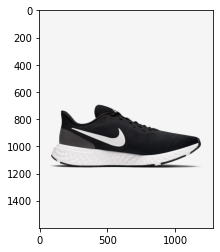

In [13]:
model_output("demo.jpg")

1/1 [==============================] - 0s 17ms/step
Probability 0.059754122
its a Adidas


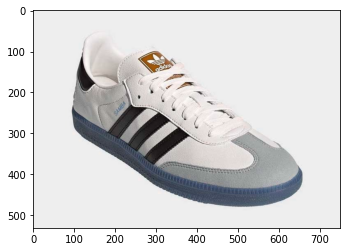

In [14]:
model_output("demo1.jpeg")

1/1 [==============================] - 0s 26ms/step
Probability 0.0038557884
its a Adidas


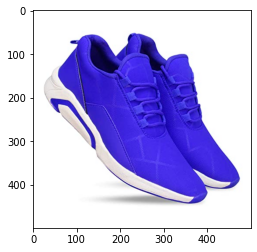

In [15]:
model_output("demo3.jpg")

1/1 [==============================] - 0s 16ms/step
Probability 0.76542336
its a Nike


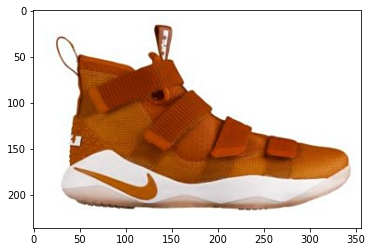

In [16]:
model_output("demo2.jpeg")

# Finish